#  第5章 python正则表达式
正则表达式是一个特殊的字符序列，它能帮助你方便的检查一个字符串是否与某种模式匹配。 Python 自1.5版本起增加了re 模块，它提供 Perl 风格的正则表达式模式。
   就其本质而言，正则表达式（或 RE）是一种小型的、高度专业化的编程语言， （在Python中）它内嵌在Python中，并通过 re 模块实现。正则表达式模式被 编译成一系列的字节码，然后由用 C 编写的匹配引擎执行。
   re 模块使 Python 语言拥有全部的正则表达式功能。 compile 函数根据一个模式字符串和可选的标志参数生成一个正则表达式对象。该对象拥有一系列方法用于正则表达式匹配和替换。 re 模块也提供了与这些方法功能完全一致的函数，这些函数使用一个模式字符串做为它们的第一个参数。

本文主要从以下方面来介绍Python正则表达式的使用：

一、 基本规则
* 功能字符
* 规则分解符
* 预定义转义字符集
* 及其他功能字符的介绍

二、 组的用法
* 无命名组
* 命名组

三. 基本函数

findall/compile/match、search/finditer/sub、subn/split

## 1. 基本规则

#### 1.1 功能字符
'.'、 '*' 、'+'、 '|'、 '?' 、'^' 、'$' 、'\'等，它们有特殊的功能含义。特别是'\'字符，它是转义引导符号，跟在它后面的字符一般有特殊的含义。

In [2]:
""" . 匹配所有字符 """
# 匹配除换行符'\n'外的所有字符

import re
s = '123\n456\n789'
print(re.findall(r'.+',s))
print(re.findall(r'.+',s,re.S)) # 如果使用'S'选项，匹配包括'\n'的所有字符

['123', '456', '789']
['123\n456\n789']


In [13]:
""" ^ 匹配字符串的开头 """
""" $ 匹配字符串的末尾 """
s = '12 34\n56 78\n100'
print(re.findall(r'^\d+',s,re.M)) # 匹配位于行首的数字
print(re.findall(r'\A\d+',s,re.M)) # 匹配位于字符串开头的数字
print(re.findall(r'\d+$',s,re.M)) # 匹配位于行尾的数字
print(re.findall(r'\d+\Z',s,re.M)) # 匹配位于字符串尾的数字

['12', '56', '100']
['12']
['34', '78', '100']
['100']


In [3]:
""" | """
# 将两个规则并列起来，以‘ | ’连接，表示只要满足其中之一就可以匹配。
# 比如[a-zA-Z]|[0-9] 表示满足数字或字母就可以匹配，这个规则等价于 [a-zA-Z0-9]
# 不过使用的时候需要注意两点：
# 1、它在 ’[‘ ‘]’ 之中不再表示或，而表示他本身的字符。如果要在 ’[‘ ‘]’ 外面表示一个 ’|’ 字符，必须用反斜杠引导，即 ’/|’ ;
# 2、它的有效范围是它两边的整条规则，比如‘ dog|cat’ 匹配的是‘ dog’ 和 ’cat’ ，而不是 ’g’ 和 ’c’ 。如果想限定它的有效范围，必需使用一个无捕获组 ‘(?: )’ 包起来。

# [a-zA-Z]|[0-9] 表示满足数字或字母就可以匹配，这个规则等价于 [a-zA-Z0-9]
s = 'I have a dog, I have a cat'
print(re.findall(r'I have a (?:dog|cat)',s))
print(re.findall(r'I have a dog|cat',s))

['I have a dog', 'I have a cat']
['I have a dog', 'cat']


In [4]:
""" * 表示匹配前面的规则0次或多次 """
""" + 表示匹配前面的规则1次或多次"""
s = 'aaa bbb111 cc22cc 33dd'
print(re.findall(r'\b[a-z]+\d*\b',s))

['aaa', 'bbb111']


In [6]:
""" ? 只匹配前面的规则0次或1次 """
s = '123 10e3 20e4e4 30ee5'
re.findall(r'\b\d+[e]?\d+\b',s)

['123', '10e3']

In [6]:
#'*'、'+'、'?'通常都是尽可能多的匹配字符。
s = r'/*part 1*/code/*part 2*/'
print(re.findall(r'//*.*/*/',s))
# 如果在*后面加上?，则尽可能少的匹配
# '*?'、'+?'、'??'最小匹配
print(re.findall(r'//*.*?/*/',s))

['/*part 1*/code/*part 2*/']
['/*part 1*/', '/*part 2*/']


#### 1.2规则分解符
'[ ]'、'( )'、'{ }'等

In [10]:
"""[  ]的使用"""
# [...] 用来表示一组字符，单独列出:[amk]匹配'a','m','k'
# [^...]匹配不在[]中的字符：[^abc]匹配除了a,b,c之外的字符

s = 'hello world'
print(re.findall(r'[helo]+',s))
print(re.findall(r'[^helo]+',s))

['hello', 'o', 'l']
[' w', 'r', 'd']


In [7]:
"""精确匹配和最小匹配"""
# '{m}'精确匹配m次
# '{m,n}'匹配最少m次，最多n次 (n>m)
s = '1 22 333 4444 55555 666666'
print(re.findall(r'\b\d{3}\b',s)) # 匹配3位数
print(re.findall(r'\b\d{2,4}\b',s)) # 匹配2位数到4位数
print(re.findall(r'\b\d{5,}\b',s)) # 匹配5位数以上的数
print(re.findall(r'\b\d{1,4}\b',s)) # 匹配4位数以下的数

['333']
['22', '333', '4444']
['55555', '666666']
['1', '22', '333', '4444']


In [8]:
"""前向界定与后向界定"""
# '(?<=...)'前向界定
# 括号中'...'代表你希望匹配的字符串的前面应该出现的字符串
# '(?=...)'后向界定
# 括号中的'...'代表你希望匹配的字符串后面应该出现的字符串
s = r'aaa111aaa,bbb222,333ccc'
print(re.findall(r'(?<=aaa)\d+(?=[a-z]+)',s))

['111']


In [19]:
# 注意：在前向界定括号中的表达式必须是常值，也就是不可以在前向界定的括号里写正则式

In [9]:
"""前向非界定与后向非界定"""
# '(?<!...)'前向非界定
# 只有当你希望的字符串前面不是'...'的内容时才匹配
# '(?!...)'后向非界定
# 只有当你希望的字符串后面不是'...'时才匹配
print(re.findall(r'\d+(?!\w+)',s))

['222']


#### 1.3 预定义转义字符集
"\d"、"\w"、"\s"等等，它们是以字符'\'开头，后面接一个特定字符的形式，用来指示一个预定好的含义。
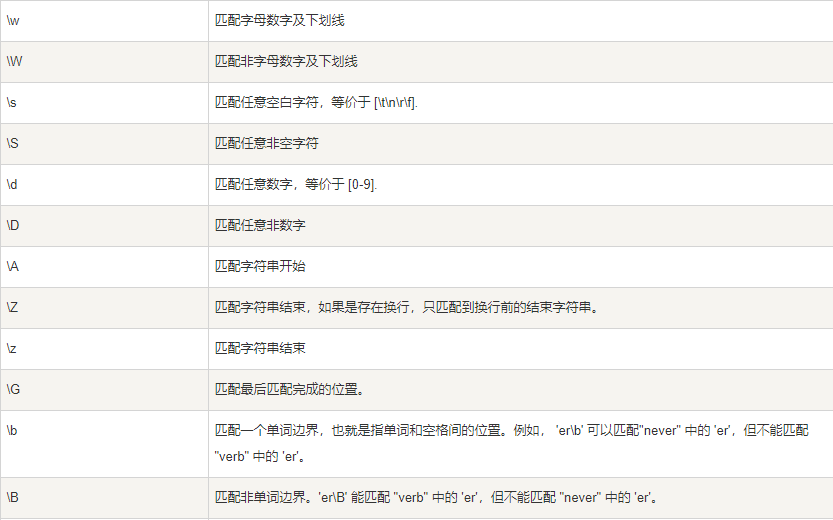

In [15]:
"""\w 匹配任何字母数字及下划线"""
re.findall('\w+','aa._12a$$')

['aa', '_12a']

In [16]:
"""\W 匹配任意非字母数字字符"""
re.findall('\W+','aa._12a$$')

['.', '$$']

In [13]:
"""\s 匹配任意空白字符"""
re.findall('\s','aa bbb123.')

[' ']

In [14]:
"""\S 匹配任意非空字符"""
re.findall('\S+','aa bbb123.')

['aa', 'bbb123.']

In [11]:
"""\d 匹配任何数字; 相当于[0-9]"""
print(re.findall('\d','aaazz1112224ccc'))
print(re.findall('\w+\d+','aaazz1112224ccc'))

['1', '1', '1', '2', '2', '2', '4']
['aaazz1112224']


In [12]:
"""\D 匹配任意非数字  相当于[^0-9]"""
re.findall('\D+','aa111bbb')

['aa', 'bbb']

In [22]:
"""\A 匹配字符串开头"""
s = '12 34\n56 78\n100'
print(re.findall(r'\A\d+',s,re.M))  # 匹配位于字符串开头的数字
"""\Z 匹配字符串结尾"""
print(re.findall(r'\d+\Z',s,re.M))  # 匹配位于字符串结尾的数字
# 与^、$比较
print(re.findall(r'^\d+',s,re.M))  # 匹配位于行首的数字
print(re.findall(r'\d+$',s,re.M))  # 匹配位于行尾的数字

['12']
['100']
['12', '56', '100']
['34', '78', '100']


In [24]:
"""\b 匹配单词边界"""
s = 'abc abcde bc bcd'
print(re.findall(r'\bbc\b',s))  # 匹配一个单独的单词'bc'
"""\B 匹配非单词边界"""
print(re.findall(r'\Bbc\w+',s)) # 匹配了'abcde'中的'bcde'

['bc']
['bcde']


#### 1.4 其他功能字符
'#'、'!'、':'、'-'等，它们只在特定的情况下表示特殊的含义，比如(?#...)就表示一个注释，里面的内容会被忽略。

In [26]:
"""无捕获组"""
# '(?:)'无捕获组
s = 'ababab abbabb aabaab'
print(re.findall(r'\b(?:ab)+\b',s)) # 匹配字符中重复的'ab'

['ababab']


In [27]:
"""注释"""
re.findall(r'\d+(?#匹配数字)','aa112bb')

['112']

## 2. 组的用法

#### 2.1 无命名组
最基本的组，由一对圆括号括起来的正则式。

In [23]:
# '('')'无命名组
# 下面以匹配包夹在字母中间的数字为例
s = 'aaa111aaa,bbb222,333ccc'
print(re.findall(r'[a-z]+\d+[a-z]+',s))
print(re.findall(r'[a-z]+(\d+)[a-z]+',s))
# 可以看到findall函数只返回了包含在'()'中的内容

['aaa111aaa']
['111']


#### 2.2 命名组
命名组形式为：'(?P< name >...)'

'(?P’ 代表这是一个 Python 的语法扩展, ’<…>’ 里面是你给这个组起的名字，比如你可以给一个全部由数字组成的组叫做 ’num’ ，它的形式就是 ’(?P<num>/d+)’。
起了名字之后，我们就可以在后面的正则式中通过名字调用这个组，它的形式如下：
'(?P=name)'调用已匹配的命名组

In [28]:
s = 'aaa111aaa,bbb222,333ccc,444ddd444,555eee666,fff777ggg'
print(re.findall(r'([a-z]+)\d+([a-z]+)',s)) # 找出中间夹有数字的字母
print(re.findall(r'(?P<g1>[a-z]+)\d+(?P=g1)',s)) # 找出被中间夹有数字的前后同样的字母

# 从上面的例子看出，调用已被匹配的组是已被匹配的组，也就是说它里面的内容是和前面命名组里的内容是一样的

[('aaa', 'aaa'), ('fff', 'ggg')]
['aaa']


'\number' 通过序号调用已匹配的组

In [29]:
# 正则式中的每个组都有一个序号，序号是按组从左到右，从1开始的数字
# 可以通过下面形式来调用已匹配的组
re.findall(r'([a-z]+)\d+\1',s)

['aaa']

'(?(id/name)yes-pattern|no-pattern)'判断指定组是否已匹配，执行相应的规则

In [30]:
# 如果id/name指定的组在前面匹配成功了，则执行yes-pattern的正则式，否则执行no-pattern的正则式
# 比如要匹配一些形如usr@mail的邮箱地址，不过有的写出<usr@mail>，要匹配这两种情况，可以这样写
s = '<usr1@mail1> usr2@mail2'
re.findall(r'(<)?\s*(\w+@\w+)\s*(?(1)>)',s)

[('<', 'usr1@mail1'), ('', 'usr2@mail2')]

## 3. 基本函数

### 3.1 findall
findall就是在目标字符串中查找符合规则的字符串。
#### findall(rule,target[,flag])
- 第一个参数是规则，第二个参数是目标字符串，后面还可以跟一个规则选项。
- 返回的结果是一个列表，中间存放的是符合规则的字符串。如果没有符合规则的字符串被找到，就返回一个空列表。

In [31]:
s = '123Python456Python789'
re.findall(r'Python',s)

['Python', 'Python']

### 3.2 compile
compile 函数根据一个模式字符串和可选的标志参数生成一个正则表达式对象。该对象拥有一系列方法用于正则表达式匹配和替换。

In [37]:
# 如果要多次使用统一规则来进行匹配的话，可以使用re.compile函数来将规则预编译
# compile(rule[,flag)
# 将正则规则编译成一个Pattern对象。
# 第一个参数是规则式，第二个选项为规则选项
# 返回一个Pattern对象
s = '111,222,aaa,bbb,ccc333,444ddd'
rule = r'\b\d+\b'
compile_rule = re.compile(rule)
compile_rule.findall(s)

['111', '222']

compile函数还可以指定一些规则标志，来指定一些特殊选项。多个选项之间用‘|’连接起来,具体规则标志如下：
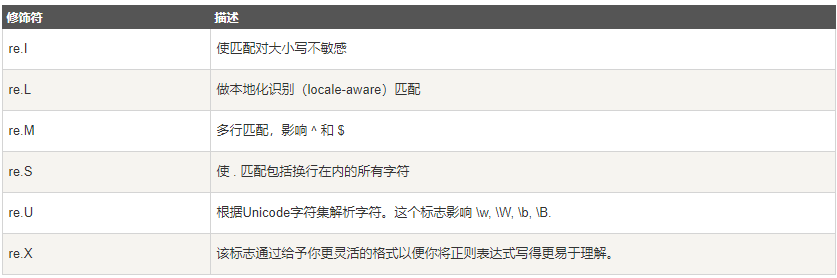

In [39]:
s = '123 456\n789 666\n888 233'
rc = re.compile(r'^\d+') # 匹配一个位于开头的数字，没有使用M选项
print(rc.findall(s))
rcm = re.compile(r'^\d+',re.M) # 使用M选项
print(rcm.findall(s))

rc = re.compile(r'\d+$')
print(rc.findall(s))
rcm = re.compile(r'\d+$',re.M)
print(rcm.findall(s))

['123']
['123', '789', '888']
['233']
['456', '666', '233']


对于compile函数编译生成的Pattern对象，它同样有findall,match,search,finditer,sub,subn,split这些函数，不过这几个函数的参数有所变化（可以指定查找开始位置和结束位置），具体变化如下：
- findall(targetString[,startPos[,endPos]])
- finditer(targetString[,startPos[,endPos]])
- match(targetString[,startPos[,endPos]])
- search(targetString[,startPos[,endPos]])

除了有和re模块的函数同样的函数外，Pattern对象还多了以下属性：
- flags 查询编译时的选项
- pattern 查询编译时的规则
- groupindex 规则里的组

In [65]:
p = re.compile(r'(?P<word>/b[a-z]+/b)|(?P<num>/b/d+/b)|(?P<id>/b[a-z_]+/w*/b)',re.I)
print(p.flags)  # re.I对应为34
print(p.pattern) # 查看规则
print(p.groupindex)  # 以字典形式返回每个组名和组的序号

34
(?P<word>/b[a-z]+/b)|(?P<num>/b/d+/b)|(?P<id>/b[a-z_]+/w*/b)
{'word': 1, 'num': 2, 'id': 3}


### 3.3 match与search
match函数的作用是尝试从字符串string的起始位置开始匹配一个模式pattern，如果匹配成功返回一个匹配成功后的Match对象，否则返回None。
search函数扫描整个字符串并返回第一次成功的匹配对象，如果匹配失败，则返回None。
- match(rule,targetString[,flag])
- search(rule,targetString[,flag])

第一个参数是正则规则，第二个是目标字符串，第三个是选项。若匹配成功则返回一个MAtch对象，失败无返回

In [73]:
# match与search唯一的区别是：
# match从字符串的开头开始匹配，如果开头位置没有匹配成功，则匹配失败
# 而search匹配整个字符串，直到找到一个匹配。

s = 'www.abcdef.com'
print(re.match('www',s)) # 在起始位置匹配
print(re.match('com',s))  # 不在起始位置匹配

print(re.search('www',s)) # 在起始位置匹配
print(re.search('com',s)) # 不在起始位置匹配

# 注意,如果匹配不成功，它们则返回一个NoneType。所以在对匹配完的结果进行操作之前，需要先判断一下是否匹配成功了

lines = 'Cats are smarter than dogs'
matchObj = re.match(r'(.*) are (.*?) .*',lines, re.M|re.I)
if matchObj:
    print(matchObj.group())
    print(matchObj.group(1))
    print(matchObj.group(2))
else:
    print("No match!")

<_sre.SRE_Match object; span=(0, 3), match='www'>
None
<_sre.SRE_Match object; span=(0, 3), match='www'>
<_sre.SRE_Match object; span=(11, 14), match='com'>
Cats are smarter than dogs
Cats
smarter


In [3]:
# 组的名字与序号
# 正则式中的每个组都有一个序号，它是按定义时从左到右的顺序从 1 开始编号的。其实， re 的正则式还有一个 0 号组，它就是整个正则式本身。
s = 'Tom 24 66666 <='
p = re.compile( r'(?P<name>[a-z]+)\s+(?P<age>\d+)\s+(?P<tel>\d+).*' , re.I )
m = p.search(s)
print(m.groups()) # 查看匹配的各组的情况
print(m.group('name')) # 使用组名获取匹配的字符串
print(m.group(1)) # 使用组序号获取匹配的字符串，同使用组名的效果一样
print(m.group(0)) # 等同于m.group()
print(m.group())

('Tom', '24', '66666')
Tom
Tom
Tom 24 66666 <=
Tom 24 66666 <=


Match对象的方法
- group([index|id])：获取匹配的组，缺省返回组0，也就是全部值
- groups()：返回全部的组
- groupdict()：返回以组名为key，匹配的内容为values的字典

In [4]:
print(m.groupdict())  # 查看匹配的内容

# start([group]) 获取匹配的组的开始位置
# end([group]) 获取匹配的组的结束位置
# span([group]) 获取匹配的组的（开始，结束）位置

print(m.start('name'))
print(m.end('name'))
print(m.span('name'))

# expand(template) 根据一个模板用找到的内容替换模板里的相应位置
print(m.expand(r'name is \g<1>,age is \g<age>,tel is \3'))

{'name': 'Tom', 'age': '24', 'tel': '66666'}
0
3
(0, 3)
name is Tom,age is 24,tel is 66666


Match除了以上这些函数外，Match对象还有这些属性
- pos 搜索开始的位置参数
- endpos 搜索结束的位置参数
- lastindex 最后匹配的组的序号
- lastgroup 最后匹配的组名

In [5]:
print(m.pos)  # 查看开始位置参数
print(m.endpos)  # 查询搜索结束的位置参数
print(m.lastindex) # 最后匹配的组的序号
print(m.lastgroup) # 最后匹配的组名

0
15
3
tel


### 3.4 finditer
finditer函数跟findall函数类似，但返回的是一个迭代器， 而不是一个像findall函数那样的存有所有结果的list。
- finditer(rule,target[,flag])

finditer函数和findall函数的区别：
- findall返回所有匹配的字符串，并存在一个列表中
- finditer则并不直接返回这些字符串，而是返回一个迭代器

In [45]:
s = '111 222 333 444'
for i in re.finditer(r'\d+',s):
    print(i.group(),i.span())  # 打印每次得到的字符串和起始结束位置

111 (0, 3)
222 (4, 7)
333 (8, 11)
444 (12, 15)


### 3.5 sub 与 subn
re模块还提供了对字符串的替换和修改函数。sub和subn函数都用于替换字符串中的匹配项。
- sub(rule,replace,target[,count])
- subn(rule,replace,target[,count])

第一个参数为正则规则，第二个参数指定用来替换的字符串，第三个参数是目标字符串，第四个参数是最多替换次数

sub和subn的区别：
- sub返回一个被替换的字符串
- subn返回一个元组，第一个元素是被替换的字符串，第二个元素是一个数字，表明产生了多少次替换

In [51]:
s = 'java c java c++ java'
print(re.sub(r'java','Python',s)) # 将所有java替换成Python
print(re.sub(r'java','Python',s,2)) # 只替换前两个
print(re.subn(r'java','Python',s)) # 可以查看发生了多少次替换

Python c Python c++ Python
Python c Python c++ java
('Python c Python c++ Python', 3)


### 3.6 split
split方法能够将字符串分割后返回列表。split为切片函数，使用指定的正则规则在目标字符串中查找匹配的字符串，用它们作为分界，把字符串切片。

split(rule,target[,maxsplit])
- 第一个参数是正则规则，第二个参数是目标字符串，第三个参数是最多切片次数
- 返回一个被切完的子字符串的列表

In [53]:
s = 'aaa , bbb , ccc'
re.split(r'\s*,\s*',s)  # 以','分隔开，同时去掉逗号前后的空格

['aaa', 'bbb', 'ccc']